<a href="https://colab.research.google.com/github/matheusapostulo/lung-cancer-machine-learning/blob/main/Lung_Cancer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libs 

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Data Exploration and Visualization 

In [5]:
# Reading the csv diretcly from csv in my github
url = 'https://raw.githubusercontent.com/matheusapostulo/lung-cancer-machine-learning/main/survey%20lung%20cancer.csv'
lung_df = pd.read_csv(url)


## Duplicated Rows

In [6]:
#Checking duplicated rows - There are 33 duplicated rows
lung_df.duplicated().sum()

33

In [7]:
#New df without duplicaded rows
new_lung_df = lung_df.drop_duplicates()

In [8]:
# Checking duplicated rows in new df - Now, there is 0 duplicated rows
new_lung_df.duplicated().sum()

0

In [9]:
# new df rows and columns 
shape = new_lung_df.shape
print(f"Rows= {shape[0]}")
print(f"Columns= {shape[1]}")

Rows= 276
Columns= 16


## Removing categorical features

Afterwards, we'll train the algorithms with both df to get the highest possible accuracy

In [10]:
## Transform Gender and Lung_cancer
lung_df.GENDER[lung_df['GENDER'] == 'M'] = 2
lung_df.GENDER[lung_df['GENDER'] == 'F'] = 1
new_lung_df.GENDER[new_lung_df['GENDER'] == 'M'] = 2
new_lung_df.GENDER[new_lung_df['GENDER'] == 'F'] = 1

lung_df.LUNG_CANCER[lung_df['LUNG_CANCER'] == 'YES'] = 2
lung_df.LUNG_CANCER[lung_df['LUNG_CANCER'] == 'NO'] = 1
new_lung_df.LUNG_CANCER[new_lung_df['LUNG_CANCER'] == 'YES'] = 2
new_lung_df.LUNG_CANCER[new_lung_df['LUNG_CANCER'] == 'NO'] = 1

<ipython-input-10-c7ae96b32598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_df.GENDER[lung_df['GENDER'] == 'M'] = 2
<ipython-input-10-c7ae96b32598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_df.GENDER[lung_df['GENDER'] == 'F'] = 1
<ipython-input-10-c7ae96b32598>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lung_df.GENDER[new_lung_df['GENDER'] == 'M'] = 2
/usr/local/lib/python3.8/dist-packages/pandas/core/ge

In [11]:
lung_df['LUNG_CANCER'] = lung_df['LUNG_CANCER'].astype(str).astype(int)
lung_df['GENDER'] = lung_df['GENDER'].astype(str).astype(int)

new_lung_df['LUNG_CANCER'] = lung_df['LUNG_CANCER'].astype(str).astype(int)
new_lung_df['GENDER'] = lung_df['GENDER'].astype(str).astype(int)

<ipython-input-11-772ef3410f03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lung_df['LUNG_CANCER'] = lung_df['LUNG_CANCER'].astype(str).astype(int)
<ipython-input-11-772ef3410f03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lung_df['GENDER'] = lung_df['GENDER'].astype(str).astype(int)


In [12]:
lung_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


In [13]:
lung_df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,1.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [15]:
# df rows and columns 
print(f"Rows= {len(lung_df)} ")
print(f"Columns= {len(lung_df.columns)} ")

Rows= 309 
Columns= 16 


## Missing values

In [16]:
#Ckecking missing values - There is not missing values
lung_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Outliers

In [17]:
# Function for find outliers at the dataframe. This function shows and returns.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   if len(outliers) > 0 and ((df.max() + df.min())/2 != 0.5) :
      print(f'{df.name} have {len(outliers)} possibles outlier! Max_valor = {df.max()} | Min_valor = {df.min()}')
      return df.name   

In [18]:
# Testing "find_outliers_IQR" in all dataset columns
# Defining a list for all columns
all_columns = lung_df.iloc[:, 1:15]

# Defining a list for all columns that've outliers
all_columns_outliers = []
# Calling the function with all columns
for i in all_columns:
 outlier = find_outliers_IQR(lung_df[i])
 if outlier != None:
  all_columns_outliers.append(outlier)
 
all_columns_outliers

AGE have 2 possibles outlier! Max_valor = 87 | Min_valor = 21


['AGE']

In [19]:
# Showing the outliers in graph form
fig = px.box(lung_df, y='AGE')
fig.show()

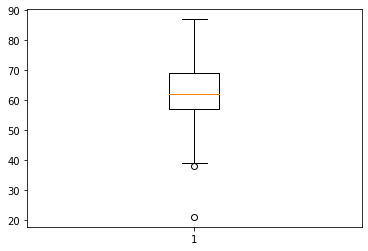

In [20]:
plt.figure()
plt.boxplot(lung_df.AGE)
plt.show()

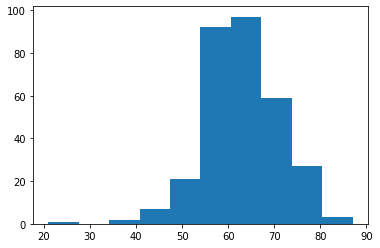

In [21]:
plt.hist(x = lung_df['AGE']);

Therefore, we can realize that this is not an outlier, it's just a representation of age, which can vary quite a bit.

## Visualizing Data

***2 = YES***   
***1 = NO*** 

In [22]:
cols = list(lung_df.columns)
cols_df = cols[1:]
cols_df

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

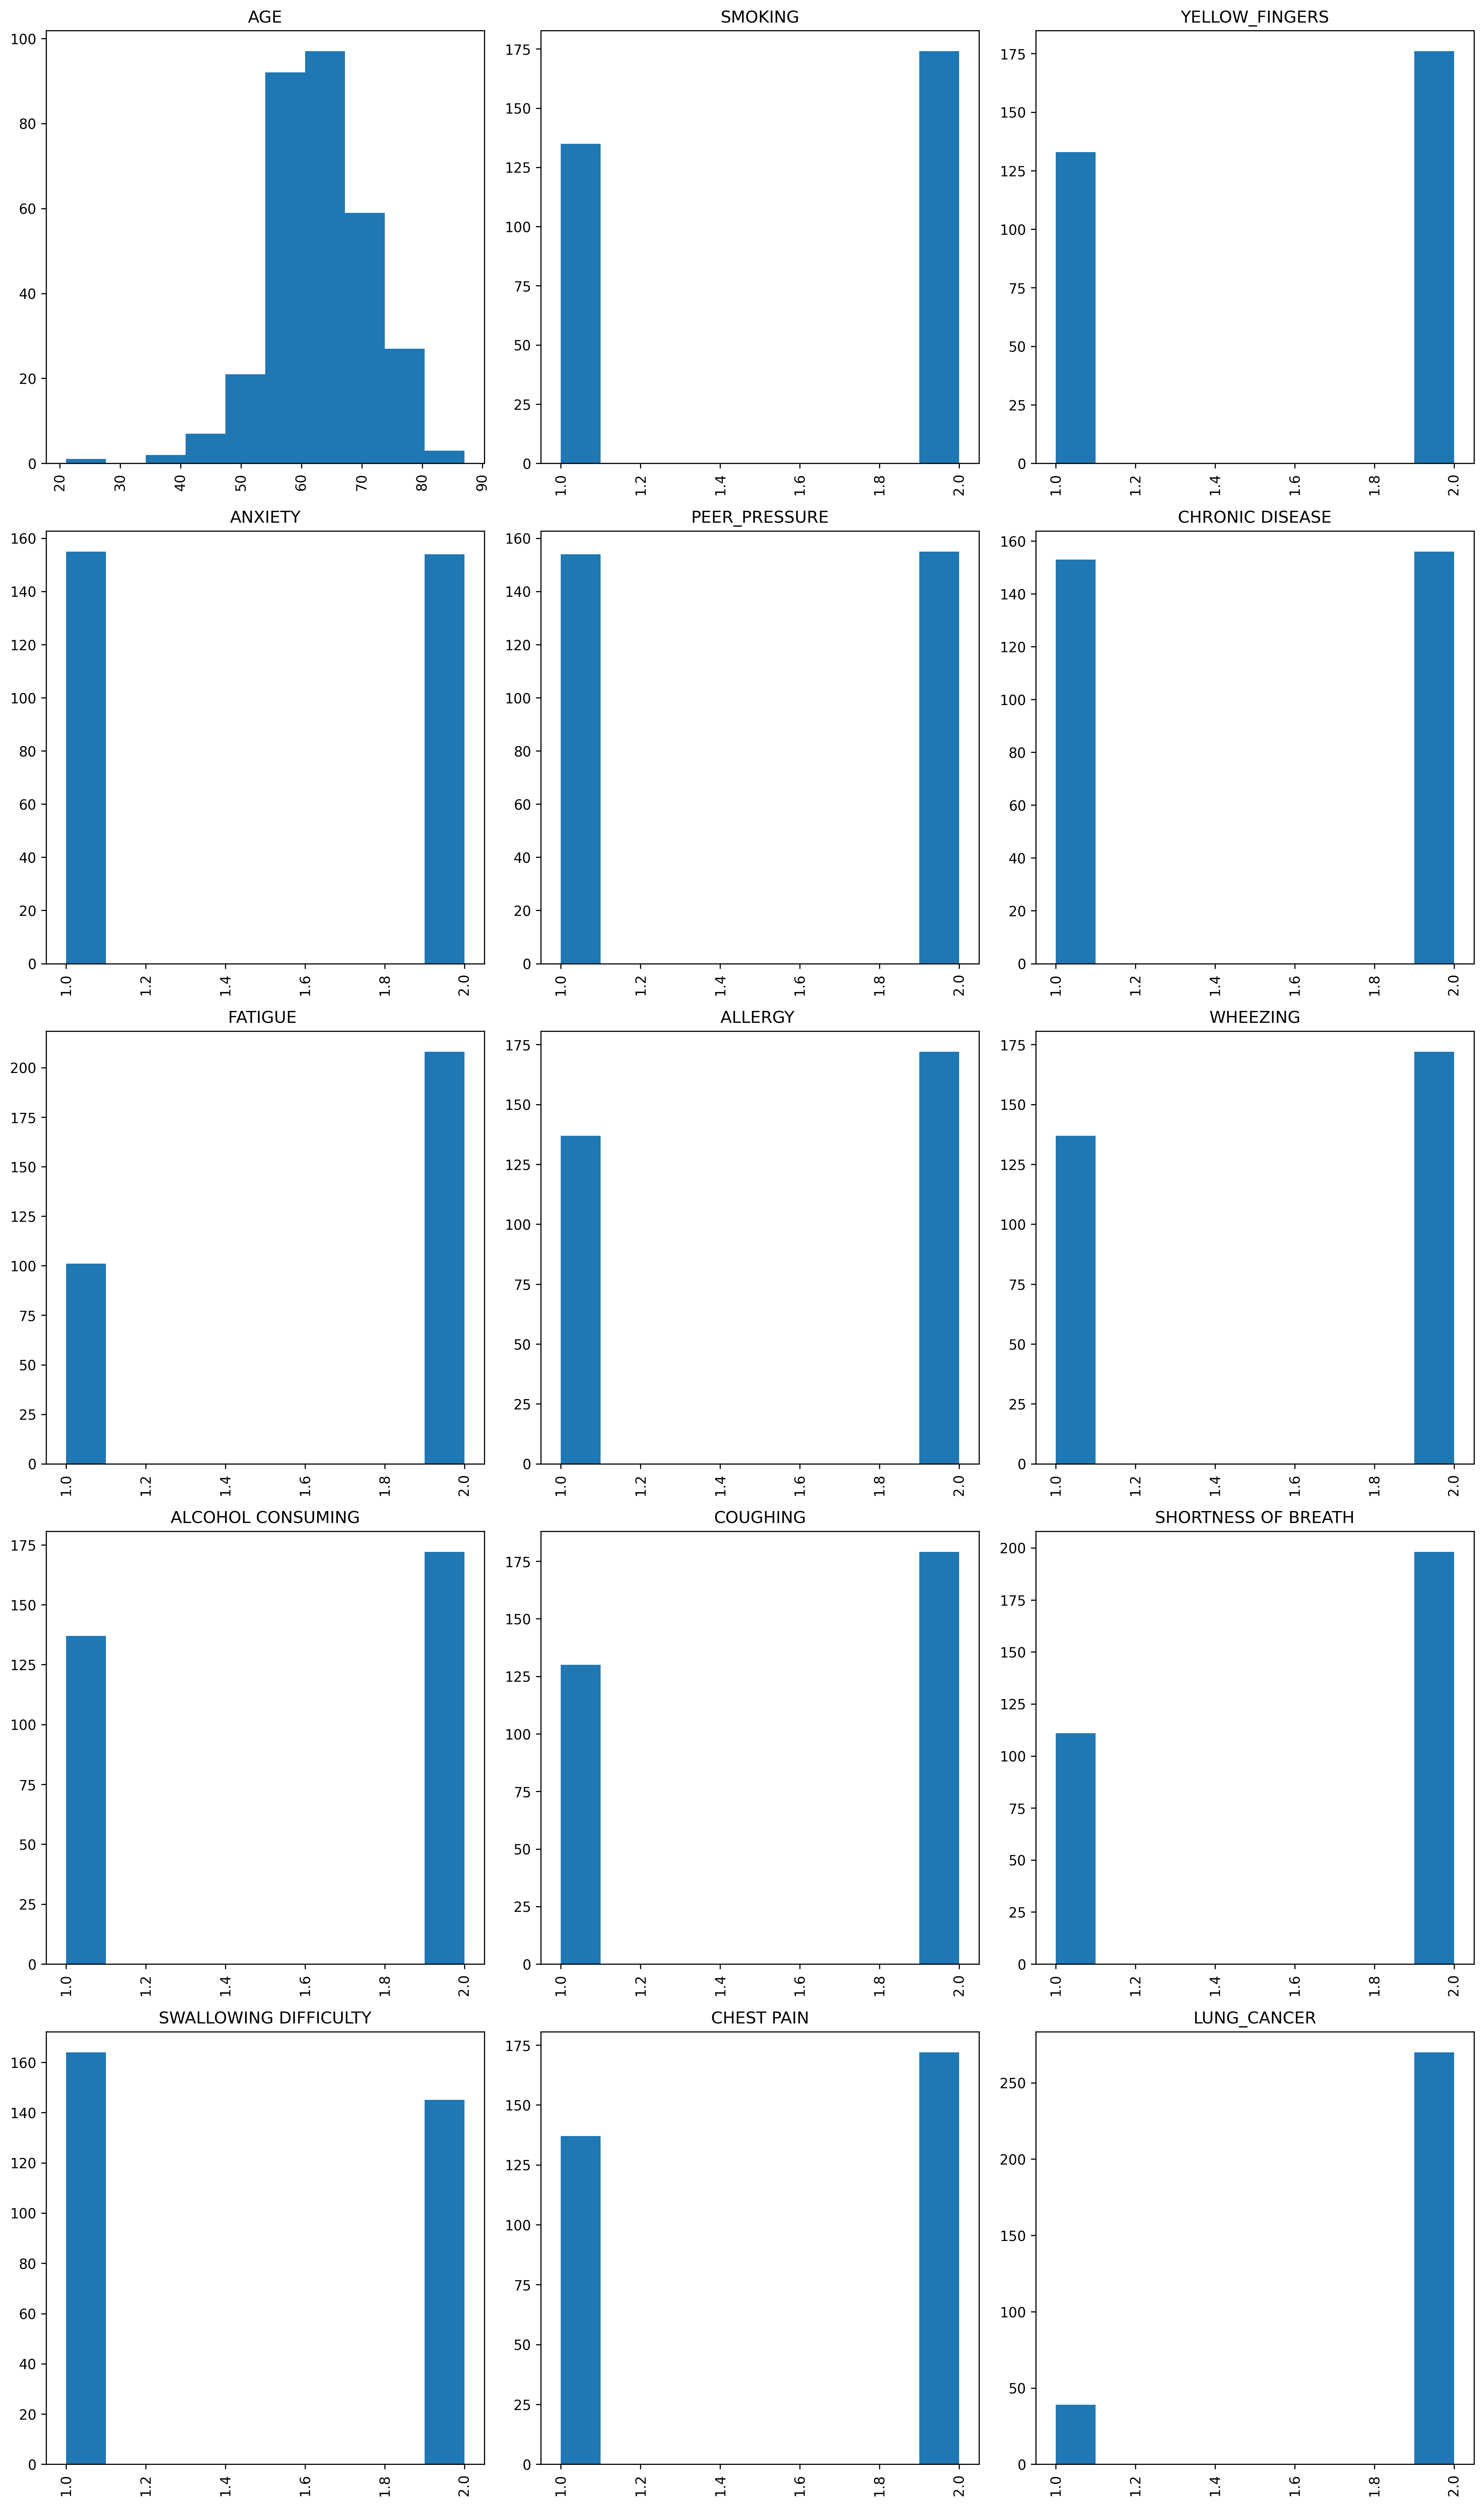

In [23]:
# Show all features values
plt.figure(figsize = (15,40), dpi = 300)
for i in range(len(cols_df)):
  plt.subplot(8,3,i+1)
  plt.title(cols_df[i])
  plt.xticks(rotation=90)
  plt.hist(lung_df[cols_df[i]])

plt.tight_layout()

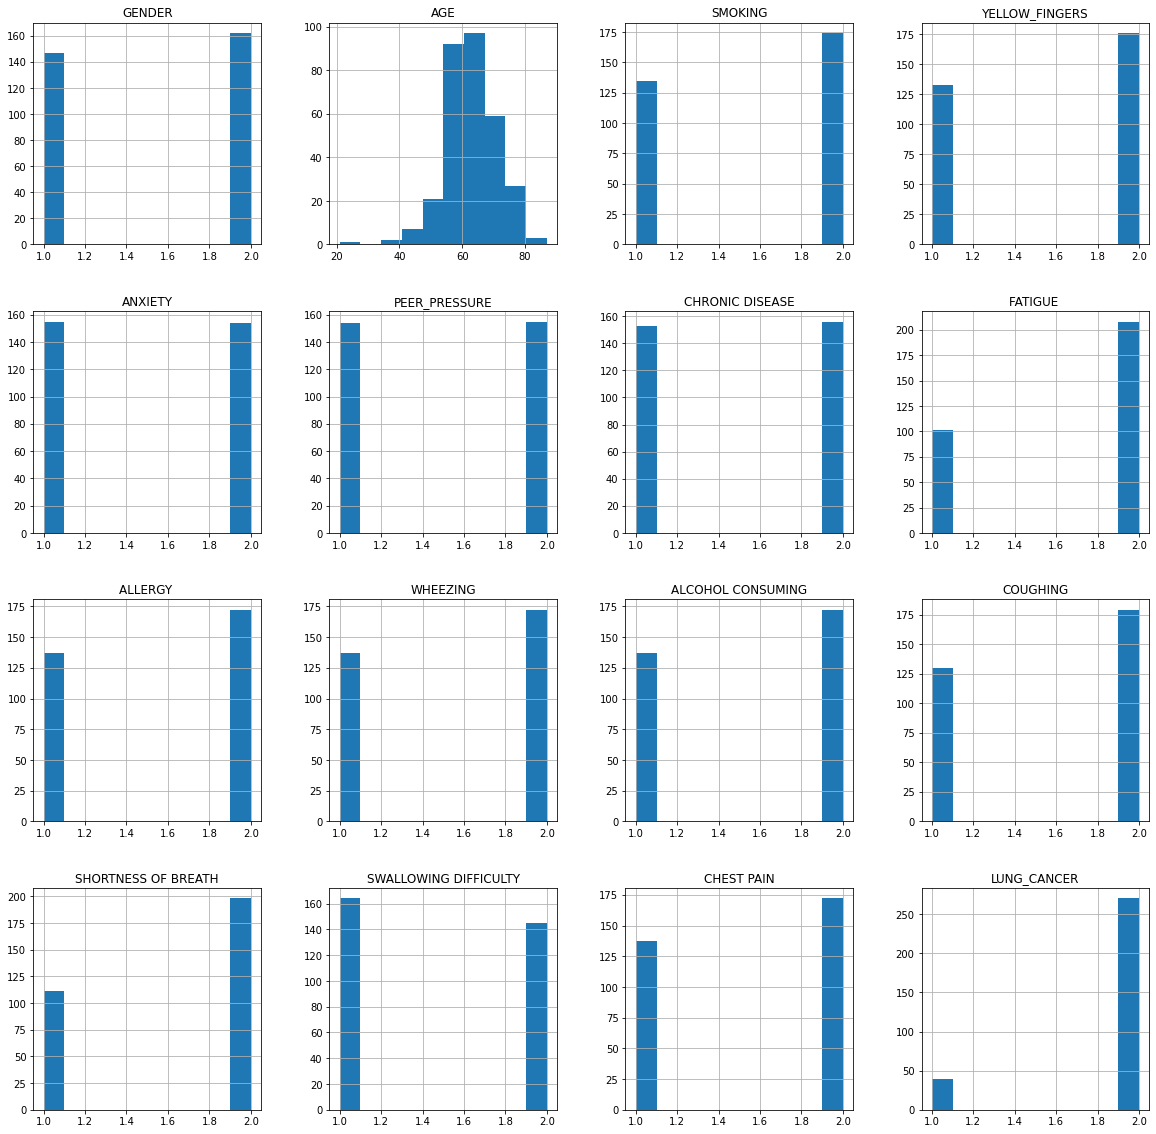

In [24]:
lung_df.hist(figsize=(20,20));

In [25]:
lung_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [26]:
lung_df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


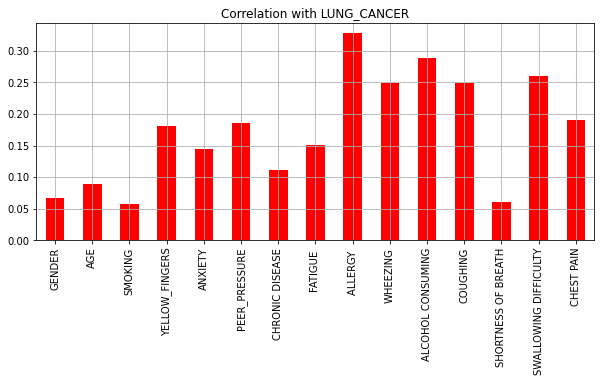

In [27]:
# correlation with lung_cancer(class)
lung_df.drop('LUNG_CANCER', axis=1).corrwith(lung_df.LUNG_CANCER).plot(kind='bar', grid=True, figsize=(10,4), title="Correlation with LUNG_CANCER", color="red");

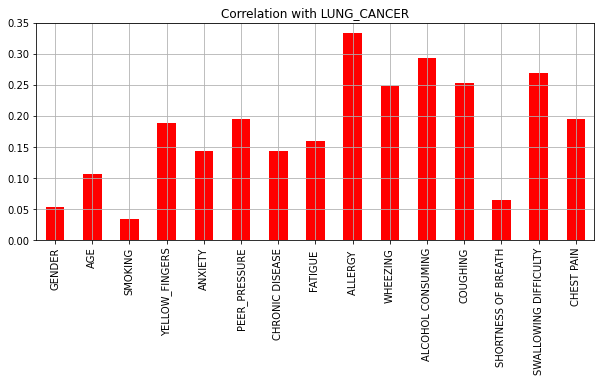

In [28]:
# correlation with lung_cancer(class)
new_lung_df.drop('LUNG_CANCER', axis=1).corrwith(new_lung_df.LUNG_CANCER).plot(kind='bar', grid=True, figsize=(10,4), title="Correlation with LUNG_CANCER", color="red");

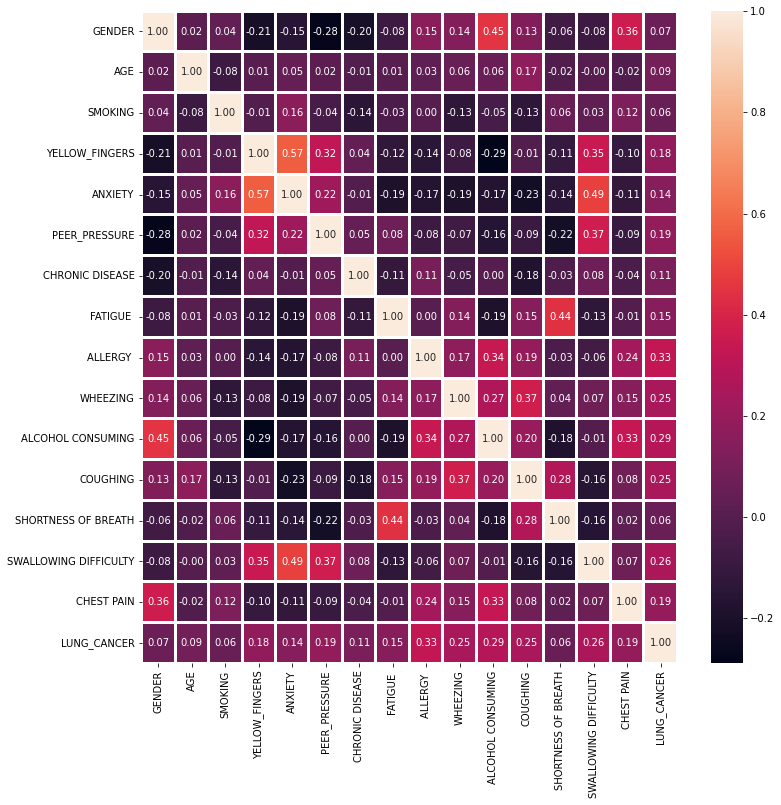

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(lung_df.corr(), annot=True, linewidth=2.0, fmt='0.2f')
plt.show()

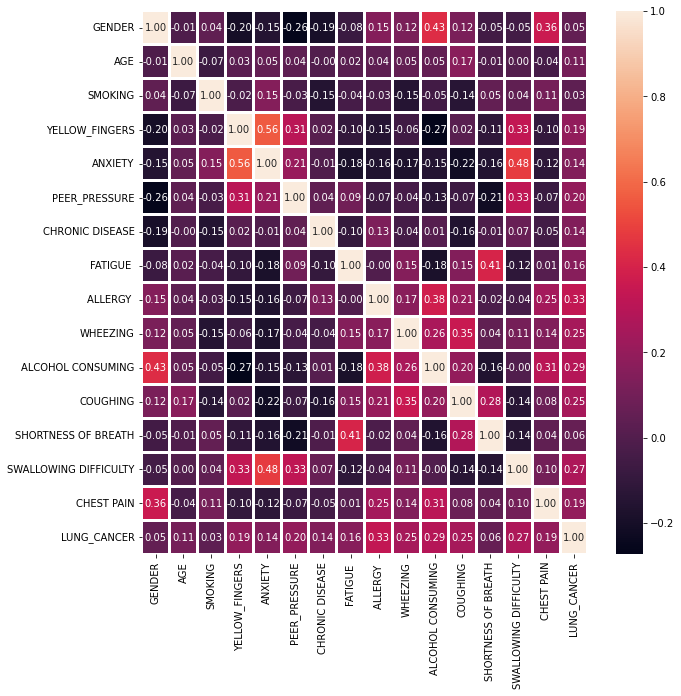

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(new_lung_df.corr(), annot=True, linewidth=2.0, fmt='0.2f')
plt.show()

LUNG CANCER BY GENDER

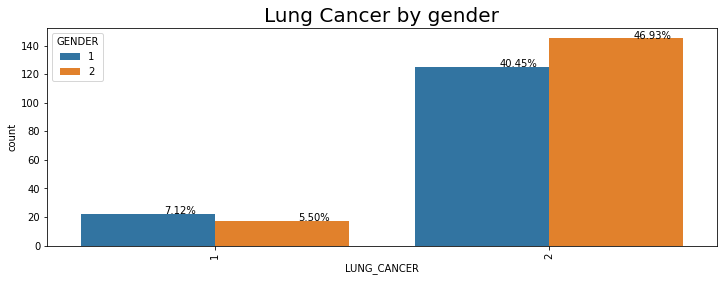

In [34]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='LUNG_CANCER',data=lung_df,hue='GENDER')
plt.xticks(rotation=90)
plt.title('Lung Cancer by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/lung_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

M = 2  
F = 1  

Gender has no effect to developing Lung Cancer!

In [ ]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='LUNG_CANCER',data=lung_df,hue='GENDER')
plt.xticks(rotation=90)
plt.title('Lung Cancer by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/lung_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

SMOKING

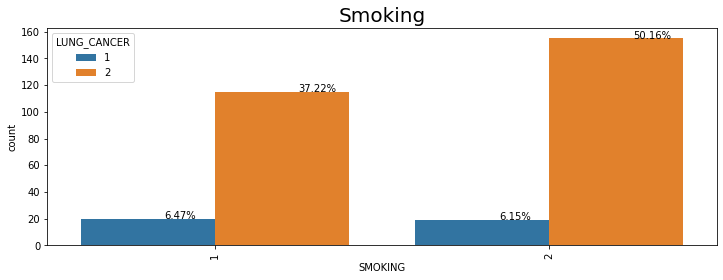

In [36]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='SMOKING',data=lung_df,hue='LUNG_CANCER')
plt.xticks(rotation=90)
plt.title('Smoking',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/lung_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

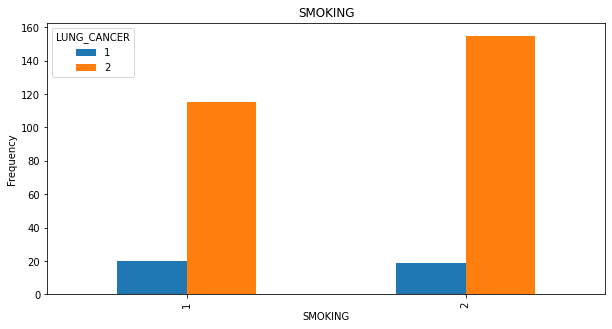

In [47]:
pd.crosstab(lung_df.SMOKING,lung_df.LUNG_CANCER).plot(kind="bar",figsize=(10,5))

plt.title('SMOKING')
plt.xlabel("SMOKING")
plt.ylabel('Frequency')
plt.show()

2 = YES  
1 = NO  
We can realize that smoking increases the risk of developing lung cancer, the proportion increases when the person has lung cancer and is a smoker!


ALLERGY

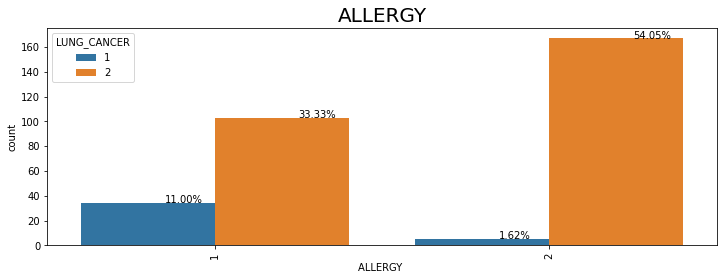

In [46]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='ALLERGY ',data=lung_df,hue='LUNG_CANCER')
plt.xticks(rotation=90)
plt.title('ALLERGY',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/lung_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

2 = YES  
1 = NO  
If a person has an allergy, the chance of having lung cancer increases a lot!

AGE

In [61]:
# Taking the average age, where there is the highest concentration of people
AGE_df = lung_df.loc[(lung_df['AGE'] >= 54) & (lung_df['AGE'] <= 72)]

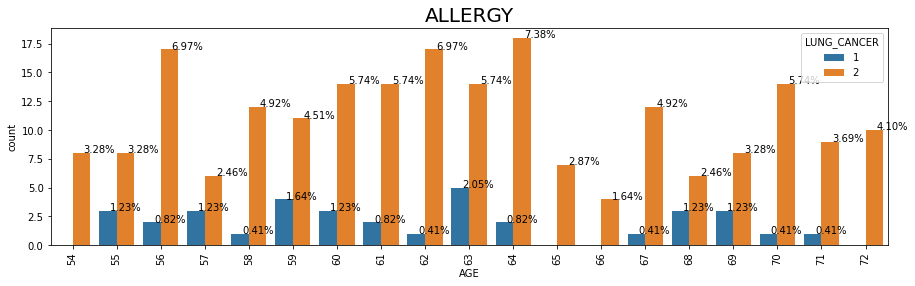

In [65]:
plt.figure(figsize=(15,4))
x= sns.countplot(x='AGE',data=AGE_df,hue='LUNG_CANCER')
plt.xticks(rotation=90)
plt.title('ALLERGY',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/AGE_df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Predictors and Classes


In [ ]:
x_lung = lung_df.iloc[:, 0:15].values
new_x_lung = new_lung_df.iloc[:, 0:15].values

In [ ]:
x_lung

array([[2, 69, 1, ..., 2, 2, 2],
       [2, 74, 2, ..., 2, 2, 2],
       [1, 59, 1, ..., 2, 1, 2],
       ...,
       [2, 58, 2, ..., 1, 1, 2],
       [2, 67, 2, ..., 2, 1, 2],
       [2, 62, 1, ..., 1, 2, 1]], dtype=object)

In [ ]:
y_lung = lung_df.iloc[:, 15].values
new_y_lung = new_lung_df.iloc[:, 15].values

In [ ]:
y_lung

array([2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# Split of bases into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_lung_training, x_lung_test, y_lung_training, y_lung_test = train_test_split(x_lung, y_lung, test_size=0.15, random_state=0)

In [ ]:
new_x_lung_training, new_x_lung_test,new_y_lung_training,new_y_lung_test = train_test_split(new_x_lung, new_y_lung, test_size=0.15, random_state=0)

In [ ]:
x_lung_training.shape

(262, 15)

In [ ]:
y_lung_training.shape

(262,)

In [ ]:
x_lung_test.shape

(47, 15)

In [ ]:
y_lung_test.shape

(47,)

## Save Variables

In [ ]:
import pickle

In [ ]:
with open('lung.pkl', mode = 'wb') as f:
  pickle.dump([x_lung_training, y_lung_training, x_lung_test, y_lung_test],f)

In [ ]:
with open('new_lung.pkl', mode = 'wb') as f:
  pickle.dump([new_x_lung_training, new_y_lung_training, new_x_lung_test, new_y_lung_test],f)

# BAYES ALGORITHM - 87.23% (without scaling)  
# BAYES ALGORITHM - 87.23% (without scaling and duplicated rows)

In [ ]:
with open('lung.pkl', 'rb') as f:
  x_lung_training, y_lung_training, x_lung_test, y_lung_test = pickle.load(f)

In [ ]:
with open('new_lung.pkl', 'rb') as f:
  new_x_lung_training, new_y_lung_training, new_x_lung_test, new_y_lung_test = pickle.load(f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_lung = GaussianNB()

In [ ]:
new_naive_lung = GaussianNB()

In [ ]:
naive_lung.fit(x_lung_training, y_lung_training)

GaussianNB()

In [ ]:
new_naive_lung.fit(new_x_lung_training, new_y_lung_training)

GaussianNB()

In [ ]:
predictions_lung = naive_lung.predict(x_lung_test)

In [ ]:
new_predictions_lung = new_naive_lung.predict(new_x_lung_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_lung_test,predictions_lung)

0.8723404255319149

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(new_y_lung_test,new_predictions_lung)

0.8571428571428571

# RANDOM FOREST - 97.87%  
# RANDOM FOREST (without duplicated rows) - 95.23%  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
with open('lung.pkl', 'rb') as f:
  x_lung_training, y_lung_training, x_lung_test, y_lung_test = pickle.load(f)

In [ ]:
with open('new_lung.pkl', 'rb') as f:
  new_x_lung_training, new_y_lung_training, new_x_lung_test, new_y_lung_test = pickle.load(f)

In [ ]:
random_forest_lung = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=0)
random_forest_lung.fit(x_lung_training,y_lung_training)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [ ]:
random_forest_new_lung = RandomForestClassifier(n_estimators=75, criterion='entropy', random_state=0)
random_forest_new_lung.fit(new_x_lung_training,new_y_lung_training)

RandomForestClassifier(criterion='entropy', n_estimators=75, random_state=0)

In [ ]:
predictions_forest_lung = random_forest_lung.predict(x_lung_test)

In [ ]:
predictions_forest_new_lung = random_forest_new_lung.predict(new_x_lung_test)

In [ ]:
predictions_forest_new_lung

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [ ]:
y_lung_test

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_lung_test,predictions_forest_lung)

0.9787234042553191

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(new_y_lung_test,predictions_forest_new_lung)

0.9523809523809523

0.9787234042553191

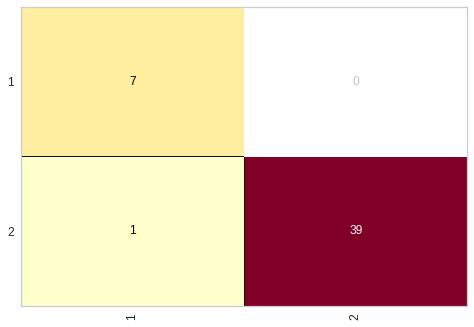

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_lung)
cm.fit(x_lung_training, y_lung_training) #Treinamento
cm.score(x_lung_test, y_lung_test) #Teste

In [ ]:
print(classification_report(y_lung_test, predictions_forest_lung))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      0.97      0.99        40

    accuracy                           0.98        47
   macro avg       0.94      0.99      0.96        47
weighted avg       0.98      0.98      0.98        47



In [ ]:
random_forest_lung.feature_importances_

array([0.05223403, 0.19383277, 0.03222074, 0.06600211, 0.06811987,
       0.07172953, 0.06556679, 0.05967743, 0.08019764, 0.0578162 ,
       0.07970738, 0.04647702, 0.04386273, 0.04622497, 0.0363308 ])

AGE = 5%   
SMOKING = 19%   
YELLOW_FINGERS = 3%   
ANXIETY = 6%   
PEER_PRESSURE = 6%   
CHRONIC DISEASE = 7%   
FATIGUE = 6%    
ALLERGY = 5%   
WHEEZING = 8%   
ALCOHOL CONSUMING = 5%   
COUGHING = 7%  
SHORTNESS OF BREATH = 4%   
SWALLOWING DIFFICULTY = 4%   
CHEST PAIN = 4%
LUNG_CANCER = 3%